In [27]:
# 1. Importer les librairies nécessaires
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import pandas as pd
from google.cloud import storage

import requests
from PIL import Image
import numpy as np
from io import BytesIO

import cv2
import numpy as np
import requests
from io import BytesIO


In [2]:
df_sample = pd.read_csv('train_df_sample.csv')

In [3]:
df_sample

,file_name,name,nbr_ingredient
0,006316.jpg,cake-chocolate,1
1,006458.jpg,pear,1
2,006493.jpg,apple,1
3,006508.jpg,salad-leaf-salad-green,1
4,006615.jpg,apple,1
...,...,...,...
3620,185123.jpg,beer,1
3621,185136.jpg,salad-leaf-salad-green,1
3622,185351.jpg,apple,1
3623,185366.jpg,apple,1


In [ ]:
# Télécharger les images

from google.cloud import storage

BUCKET_NAME = "foodbuddy-dataset"
REMOTE_PATH = "public_training_set_release_2.0/images/"
LOCAL_DIRECTORY = "images_sample/"

In [ ]:
# On s'assure que le répertoire local existe
os.makedirs(LOCAL_DIRECTORY, exist_ok=True)

In [ ]:
# Accès au Gcloud avec credentials
client = storage.Client()
bucket = client.bucket(BUCKET_NAME)

In [ ]:
#Boucle de téléchargement des images
for file_name in df_sample['file_name']:
    storage_filename = f"{REMOTE_PATH}{file_name}"
    local_filename = os.path.join(LOCAL_DIRECTORY, file_name)
    blob = bucket.blob(storage_filename)
    blob.download_to_filename(local_filename)
    print(f"Téléchargé : {file_name}")

Téléchargé : 006316.jpg
Téléchargé : 006458.jpg
Téléchargé : 006493.jpg
Téléchargé : 006508.jpg
Téléchargé : 006615.jpg
Téléchargé : 007055.jpg
Téléchargé : 007203.jpg
Téléchargé : 007315.jpg
Téléchargé : 007394.jpg
Téléchargé : 007460.jpg
Téléchargé : 007476.jpg
Téléchargé : 007528.jpg
Téléchargé : 007588.jpg
Téléchargé : 007595.jpg
Téléchargé : 007608.jpg
Téléchargé : 007620.jpg
Téléchargé : 007640.jpg
Téléchargé : 007659.jpg
Téléchargé : 007679.jpg
Téléchargé : 007721.jpg
Téléchargé : 007760.jpg
Téléchargé : 007799.jpg
Téléchargé : 007811.jpg
Téléchargé : 007824.jpg
Téléchargé : 007825.jpg
Téléchargé : 007829.jpg
Téléchargé : 007854.jpg
Téléchargé : 007878.jpg
Téléchargé : 007921.jpg
Téléchargé : 007934.jpg
Téléchargé : 008006.jpg
Téléchargé : 008053.jpg
Téléchargé : 008072.jpg
Téléchargé : 008076.jpg
Téléchargé : 008104.jpg
Téléchargé : 008150.jpg
Téléchargé : 008179.jpg
Téléchargé : 008203.jpg
Téléchargé : 008205.jpg
Téléchargé : 008210.jpg
Téléchargé : 008213.jpg
Téléchargé : 008

In [ ]:
# Vérifier le DataFrame existant
df_sample

,file_name,name,nbr_ingredient,image_url
0,006316.jpg,cake-chocolate,1,https://storage.cloud.google.com/foodbuddy-dat...
1,006458.jpg,pear,1,https://storage.cloud.google.com/foodbuddy-dat...
2,006493.jpg,apple,1,https://storage.cloud.google.com/foodbuddy-dat...
3,006508.jpg,salad-leaf-salad-green,1,https://storage.cloud.google.com/foodbuddy-dat...
4,006615.jpg,apple,1,https://storage.cloud.google.com/foodbuddy-dat...
...,...,...,...,...
3620,185123.jpg,beer,1,https://storage.cloud.google.com/foodbuddy-dat...
3621,185136.jpg,salad-leaf-salad-green,1,https://storage.cloud.google.com/foodbuddy-dat...
3622,185351.jpg,apple,1,https://storage.cloud.google.com/foodbuddy-dat...
3623,185366.jpg,apple,1,https://storage.cloud.google.com/foodbuddy-dat...


In [ ]:
# Associer les chemins des images téléchargées à leurs tags avec un local path
df_sample['local_path'] = df_sample['file_name'].apply(lambda x: os.path.join(LOCAL_DIRECTORY, x))


In [71]:
df_sample

,file_name,name,nbr_ingredient,image_url,local_path
0,006316.jpg,cake-chocolate,1,https://storage.cloud.google.com/foodbuddy-dat...,images_sample/006316.jpg
1,006458.jpg,pear,1,https://storage.cloud.google.com/foodbuddy-dat...,images_sample/006458.jpg
2,006493.jpg,apple,1,https://storage.cloud.google.com/foodbuddy-dat...,images_sample/006493.jpg
3,006508.jpg,salad-leaf-salad-green,1,https://storage.cloud.google.com/foodbuddy-dat...,images_sample/006508.jpg
4,006615.jpg,apple,1,https://storage.cloud.google.com/foodbuddy-dat...,images_sample/006615.jpg
...,...,...,...,...,...
3620,185123.jpg,beer,1,https://storage.cloud.google.com/foodbuddy-dat...,images_sample/185123.jpg
3621,185136.jpg,salad-leaf-salad-green,1,https://storage.cloud.google.com/foodbuddy-dat...,images_sample/185136.jpg
3622,185351.jpg,apple,1,https://storage.cloud.google.com/foodbuddy-dat...,images_sample/185351.jpg
3623,185366.jpg,apple,1,https://storage.cloud.google.com/foodbuddy-dat...,images_sample/185366.jpg


In [ ]:
# Exemple de transformation en dictionnaire si nécessaire
image_to_name = df_sample.set_index('local_path')['name'].to_dict()


In [76]:
# Exemple d'accès à un tag pour une image
for path, name in image_to_name.items():
    print(f"Image: {path}, Name: {name}")

Image: images_sample/006316.jpg, Name: cake-chocolate
Image: images_sample/006458.jpg, Name: pear
Image: images_sample/006493.jpg, Name: apple
Image: images_sample/006508.jpg, Name: salad-leaf-salad-green
Image: images_sample/006615.jpg, Name: apple
Image: images_sample/007055.jpg, Name: cake-chocolate
Image: images_sample/007203.jpg, Name: apple
Image: images_sample/007315.jpg, Name: bread-wholemeal
Image: images_sample/007394.jpg, Name: bread-wholemeal
Image: images_sample/007460.jpg, Name: mandarine
Image: images_sample/007476.jpg, Name: pear
Image: images_sample/007528.jpg, Name: beer
Image: images_sample/007588.jpg, Name: apple
Image: images_sample/007595.jpg, Name: salad-leaf-salad-green
Image: images_sample/007608.jpg, Name: pear
Image: images_sample/007620.jpg, Name: beer
Image: images_sample/007640.jpg, Name: apple
Image: images_sample/007659.jpg, Name: mandarine
Image: images_sample/007679.jpg, Name: mixed-nuts
Image: images_sample/007721.jpg, Name: bread-whole-wheat
Image: i

In [ ]:
# Définir le X

import os
import numpy as np
from PIL import Image

# Dimensions souhaitées pour les images
image_size = (128, 128)

# Liste pour stocker les images
images_array = []

# Charger et redimensionner les images
for file_name in os.listdir(LOCAL_DIRECTORY):
    if file_name.endswith('.jpg'):
        file_path = os.path.join(LOCAL_DIRECTORY, file_name)
        try:
            # Ouvrir l'image, redimensionner et convertir en tableau numpy
            img = Image.open(file_path).convert("RGB")
            img = img.resize(image_size)
            img_array = np.array(img)
            images_array.append(img_array)
        except Exception as e:
            print(f"Erreur avec l'image {file_name}: {e}")

# Convertir la liste en un tableau numpy
X = np.array(images_array, dtype="float32") / 255.0  # Normalisation entre 0 et 1

print(f"Tableau des images chargé : {X.shape}")

Tableau des images chargé : (3625, 128, 128, 3)


In [79]:
# Définir le y
y = df_sample['name']

# Faire le test train split des données
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2900, 128, 128, 3), (725, 128, 128, 3), (2900,), (725,))

TypeError: Image data of dtype <U10 cannot be converted to float

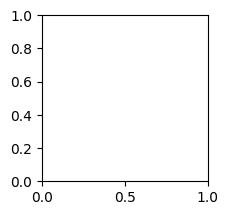

In [ ]:
# Let's plot few images to see what they look like
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
for i in range(6):
    plt.subplot(1,6, i+1)
    img = X[i]
    label = y[i][0]
    plt.imshow(img)

In [ ]:
# Preprocessing

### Normalizing pixels' intensities
X_train = X_train / 255.
X_test = X_test / 255.

### Encoding the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(labels_train, 10)
y_test = to_categorical(labels_test, 10)

In [ ]:
# Faire le padding des images


In [ ]:
# S'assurer que les images ont bien toutes la même taille (128x128)

In [ ]:
# Creation of CNN model

from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

def initialize_model():

    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Dropout(0.2))

    model.add(Conv2D(64, (2, 2), activation = 'relu', padding = 'same'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10, activation = 'softmax'))

    return model

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Initialization of model

model = initialize_model()
model.summary()

In [ ]:
# Optimize model
from tensorflow.keras import optimizers

def compile_model(model):
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
    return model

In [ ]:
# Define early stopping
initialize_model()

from tensorflow.keras.callbacks import EarlyStopping


model = compile_model(model)

es = EarlyStopping(patience = 5, verbose = 2)

history = model.fit(X_train, y_train,
                    validation_split = 0.3,
                    callbacks = [es],
                    epochs = 100,
                    batch_size = 64)

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

In [ ]:
plot_history(history)
plt.show()

In [ ]:
res = model.evaluate(X_test, y_test, verbose = 0)

print(f'The accuracy is {res[1]*100:.1f}% compared to a chance level of {1./len(labels)*100}%')

In [ ]:
# Data augmentation - if necessary????? Implies to run a new model + new test